            mean_theor mean_empiric std_theor std_empiric
sample size                                              
5                   20      19.3098   8.94427     8.97951
10                  20      19.9041   6.32456     5.99181
50                  20      20.0066   2.82843     2.84506


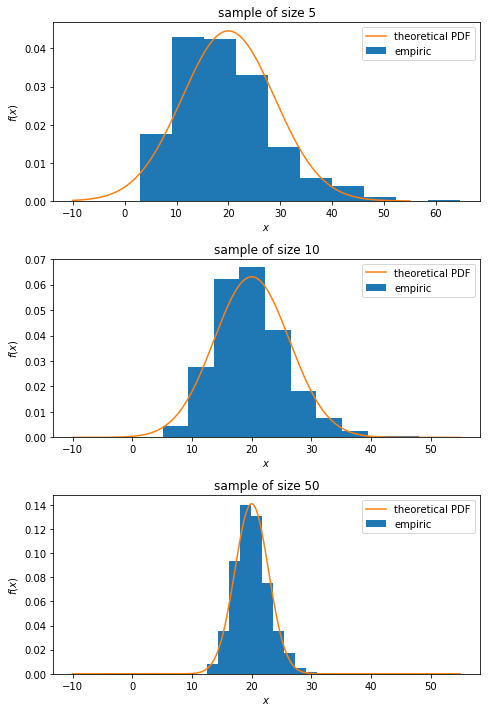

In [5]:
from __future__ import division
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

lambda_param = 1 / 20

# exponential distribution modulate the time btw two similar events that occures with lambda intensity.
# exponential distribution with parameter lambda = 1 / 20. 
exp_dist = sts.expon(scale = 1 / lambda_param)

#1000 samples with size = [ 5, 10, 50]
n = [5, 10, 50]

list_of_samples = [[exp_dist.rvs(j) for i in np.arange(1000)] for j in n]

#emperic average of every sample 
list_avg = [[sum(arr) / len(arr) for i, arr in enumerate(list_of_samples[j])] for j, _ in  enumerate(list_of_samples)]

x = np.linspace(-10, 55, 1000)

#customize the width and height of every plot
plt.figure(figsize=(7, 10))

compare_params_table = pd.DataFrame(index = n, columns = ['mean_theor', 
                                                          'mean_empiric', 
                                                          'std_theor', 
                                                          'std_empiric'])
compare_params_table.index.name = 'sample size'

#draw plots
for i in np.arange(len(n)):
  plt.subplot(len(n), 1, i + 1)
  
  # get parameters of theoretical and empiric distribution
  compare_params_table.loc[n[i]] = [1 / lambda_param, np.mean(list_avg[i]), np.sqrt(1 / lambda_param ** 2 / n[i]), np.std(list_avg[i])]
  
  # theoretical mean  = lambda ** (-1), theoretical dispersion  = lambda ** (-2)
  norm_dist = sts.norm(1 / lambda_param, np.sqrt(1 / lambda_param ** 2 / n[i]))
  norm_pdf = norm_dist.pdf(x)
  
  #draw
  plt.hist(list_avg[i], density = 1, label = 'empiric')
  plt.plot(x, norm_pdf, label='theoretical PDF')
  
  #customize axes and plots names
  plt.ylabel('$f(x)$')
  plt.xlabel('$x$')
  plt.title('sample of size ' + str(n[i]))
  plt.legend(loc='upper right')

# adjust intents between plots
plt.tight_layout()
print(compare_params_table)